Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/03_Classification'
except ImportError as e:
    pass

## Exercise 3: Classification

### 3.1. Should we play golf?
The Golf data set models different aspects of the weather (outlook, temperature, humidity, forecast) that are relevant for deciding whether one should play golf or not.

In [2]:
import pandas as pd
golf = pd.read_csv('golf.csv')
golf.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


#### 3.1.1 Learn a naïve bayes model from the Golf data set. Use this model to classify the examples in the Golf-Testset. 

- Think about ways how you can evaluate the performance of your model. 
- Which measures can be calculated from the resulting dataset?

In [3]:
from sklearn import preprocessing

# create a variable with the values of the target variable
golf_target = golf['Play']

# and remove it from the dataframe so it only contains the features that our model should use; assign it to a new variable
golf_preprocessed = golf.drop(columns='Play')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
golf_target = label_encoder.fit_transform(golf_target)

# encode the Outlook and Wind features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(golf_preprocessed[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names(['Outlook', 'Wind']))

# remove to categorical features and add the one-hot encoded features to the dataframe
golf_preprocessed = golf_preprocessed.drop(columns=['Outlook', 'Wind'])
golf_preprocessed = pd.concat([golf_preprocessed, encoded], axis=1)
golf_preprocessed.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,0.0,0.0,1.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,1.0,0.0


In [4]:
#import Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

#instantiate the an estimator and fit it to the data
naive_bayes = GaussianNB()
naive_bayes.fit(golf_preprocessed, golf_target)

GaussianNB()

In [5]:
# load the testset
golf_test = pd.read_csv('golf_testset.csv')

#apply the SAME preprocessing
# create a variable with the values of the target variable
golf_target_test = golf_test['Play']

# and remove it from the dataframe so it only contains the features that our model should use
golf_test = golf_test.drop(columns='Play')

# encode the target variable into a numeric value
golf_target_test = label_encoder.fit_transform(golf_target_test)

# encode the categorical attributes
encoded = pd.DataFrame(encoder.transform(golf_test[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names(['Outlook', 'Wind']))

# and replace them in the dataframe
golf_test = golf_test.drop(columns=['Outlook', 'Wind'])
golf_test = pd.concat([golf_test, encoded], axis=1)
display(golf_test)

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,1.0,0.0,0.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,0.0,1.0
5,65.0,70.0,0.0,1.0,0.0,0.0,1.0
6,64.0,65.0,1.0,0.0,0.0,0.0,1.0
7,72.0,95.0,0.0,0.0,1.0,1.0,0.0
8,69.0,70.0,0.0,0.0,1.0,1.0,0.0
9,75.0,80.0,0.0,0.0,1.0,1.0,0.0


In [6]:
#apply the model (predict)
golf_test_prediction = naive_bayes.predict(golf_test)

# add the prediction and gold standard (target) to the dataframe
golf_comparison = golf_test.assign(Play=golf_target_test)
golf_comparison = golf_comparison.assign(predictionPlay=golf_test_prediction)
golf_comparison

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True,Play,predictionPlay
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0,1,0
1,80.0,90.0,1.0,0.0,0.0,0.0,1.0,0,1
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0,1,1
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0,1,0
4,68.0,80.0,0.0,1.0,0.0,0.0,1.0,1,0
5,65.0,70.0,0.0,1.0,0.0,0.0,1.0,0,0
6,64.0,65.0,1.0,0.0,0.0,0.0,1.0,1,1
7,72.0,95.0,0.0,0.0,1.0,1.0,0.0,0,0
8,69.0,70.0,0.0,0.0,1.0,1.0,0.0,1,0
9,75.0,80.0,0.0,0.0,1.0,1.0,0.0,0,0


#### 3.1.2 Evaluate the performance of your model.
- by calling confusion_matrix and accuracy_score
- examine the confusion matrix. What is the accuracy of your classifier?

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

[[3 2]
 [6 3]]
Accuracy: 0.42857142857142855


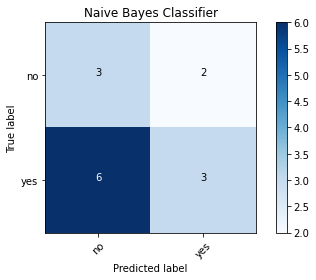

In [8]:
#import the accury score and confusion matrix function
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#compute the confusion matrix
cnf_matrix = confusion_matrix(golf_target_test, golf_test_prediction)
print(cnf_matrix)

#compute accuracy score
print("Accuracy: {}".format(accuracy_score(golf_target_test, golf_test_prediction)))

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Naive Bayes Classifier')

#### 3.1.3 Does a k-nearest-neighbor classifier work better for this task? 
- Check how the accuracy of your classifier changes to find out. 
- Do different values of k improve the performance?

In [9]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in [1,2,3,4,5]:
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(golf_preprocessed, golf_target)
    golf_test_prediction = knn_estimator.predict(golf_test)
    print("k= {} acc: {}".format(n_neighbors, accuracy_score(golf_target_test, golf_test_prediction)))

k= 1 acc: 0.7142857142857143
k= 2 acc: 0.35714285714285715
k= 3 acc: 0.6428571428571429
k= 4 acc: 0.5714285714285714
k= 5 acc: 0.6428571428571429


### 3.2. Learning a classifier for the Iris Data Set
You want to learn and evaluate a classifier for recognizing different types of Iris flowers.

#### 3.2.1 Let’s try the Naïve Bayes algorithm first.
Create a train/test split (with function train_test_split) with 30% test size and stratified sampling.  Evaluate the accuracy of the learned model.

Accuracy: 0.9555555555555556


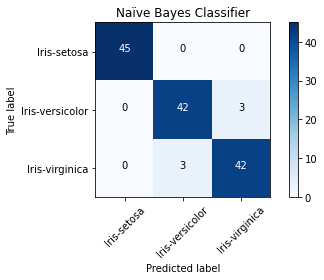

In [10]:
from sklearn.model_selection import train_test_split

# load the data
iris = pd.read_csv("iris.csv")
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_target = iris['Name']

# create the train/test split
data_train, data_test, target_train, target_test = train_test_split(iris_data, iris_target, test_size=0.9, random_state=42, stratify=iris_target)

# learn Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(data_train, target_train)
predictions = naive_bayes.predict(data_test)

# evaluate
print("Accuracy: {}".format(accuracy_score(target_test, predictions)))
cnf_matrix = confusion_matrix(target_test, predictions)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=iris_target.unique(), title='Naïve Bayes Classifier')

#### 3.2.2 Try a k-nearest-neighbor classifier on the problem. Does it perform better?

In [11]:
for n_neighbors in range(1,10):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(data_train, target_train)
    prediction = knn_estimator.predict(data_test)
    print("k= {} acc: {}".format(n_neighbors, accuracy_score(target_test, prediction)))

k= 1 acc: 0.9555555555555556
k= 2 acc: 0.9407407407407408
k= 3 acc: 0.9333333333333333
k= 4 acc: 0.9037037037037037
k= 5 acc: 0.9111111111111111
k= 6 acc: 0.9037037037037037
k= 7 acc: 0.9037037037037037
k= 8 acc: 0.8592592592592593
k= 9 acc: 0.8962962962962963


### 3.3 More Classification
In the lecture, you learned about the logistic regression. 
#### 3.3.1 Compare kNN and logistic regression using the “Weighting” dataset.

In [24]:
weighting = pd.read_csv("weighting.csv")
display(weighting.head())

weighting_target = preprocessing.LabelEncoder().fit_transform(weighting['weighting.dat (7)'])

weighting_data = weighting.drop(columns='weighting.dat (7)')

weighting_data_train, weighting_data_test, weighting_target_train, weighting_target_test = train_test_split(
    weighting_data, weighting_target, test_size=0.3, random_state=42, stratify=weighting_target)

for n_neighbors in range(1,10):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(weighting_data_train, weighting_target_train)
    prediction = knn_estimator.predict(weighting_data_test)
    print("k= {} acc: {}".format(n_neighbors, accuracy_score(weighting_target_test, prediction)))
    
from sklearn.linear_model import LogisticRegression
for C in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    logistic_regression = LogisticRegression(C=C)
    logistic_regression.fit(weighting_data_train, weighting_target_train)
    predictions = logistic_regression.predict(weighting_data_test)

    print("logistic_regression: C: {} acc: {}".format(C, accuracy_score(weighting_target_test, predictions)))

,weighting.dat (1),weighting.dat (2),weighting.dat (3),weighting.dat (4),weighting.dat (5),weighting.dat (6),weighting.dat (7)
0,2.522084,9.912066,5.473721,9.708924,3.055777,3.379995,negative
1,7.858883,7.722865,6.137092,5.414700,4.316394,5.141432,positive
2,0.116719,5.276446,0.900902,6.577496,4.379008,2.075299,negative
3,1.913008,7.986334,3.786095,8.899318,0.909737,6.283413,negative
4,4.923303,2.889413,9.938024,2.145686,2.630900,7.894478,negative


k= 1 acc: 0.9066666666666666
k= 2 acc: 0.9
k= 3 acc: 0.88
k= 4 acc: 0.8933333333333333
k= 5 acc: 0.92
k= 6 acc: 0.9266666666666666
k= 7 acc: 0.8933333333333333
k= 8 acc: 0.8933333333333333
k= 9 acc: 0.8866666666666667
logistic_regression: C: 0.0001 acc: 0.7466666666666667
logistic_regression: C: 0.001 acc: 0.9266666666666666
logistic_regression: C: 0.01 acc: 0.9466666666666667
logistic_regression: C: 0.1 acc: 0.9733333333333334
logistic_regression: C: 1.0 acc: 0.9866666666666667
logistic_regression: C: 10.0 acc: 1.0
logistic_regression: C: 100.0 acc: 1.0
logistic_regression: C: 1000.0 acc: 1.0


In [25]:
#now try the same and normalize the data first
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

weighting_data_train, weighting_data_test, weighting_target_train, weighting_target_test = train_test_split(
    weighting_data, weighting_target, test_size=0.3, random_state=42, stratify=weighting_target)

for n_neighbors in range(1,10):    
    knn_estimator = Pipeline([ 
        ('minmaxScaler', preprocessing.MinMaxScaler()), 
        ('estimator', KNeighborsClassifier(n_neighbors))
    ])
    knn_estimator.fit(weighting_data_train, weighting_target_train)
    prediction = knn_estimator.predict(weighting_data_test)
    print("knn k= {} acc: {}".format(n_neighbors, accuracy_score(weighting_target_test, prediction)))
    
from sklearn.linear_model import LogisticRegression
for C in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    logistic_regression = Pipeline([ 
            ('minmaxScaler', preprocessing.MinMaxScaler()), 
            ('estimator', LogisticRegression(C=C))
    ])
    logistic_regression.fit(weighting_data_train, weighting_target_train)
    predictions = logistic_regression.predict(weighting_data_test)

    print("logistic_regression: C= {} acc: {}".format(C, accuracy_score(weighting_target_test, predictions)))

knn k= 1 acc: 0.9
knn k= 2 acc: 0.9
knn k= 3 acc: 0.88
knn k= 4 acc: 0.8933333333333333
knn k= 5 acc: 0.92
knn k= 6 acc: 0.92
knn k= 7 acc: 0.8933333333333333
knn k= 8 acc: 0.8933333333333333
knn k= 9 acc: 0.88
logistic_regression: C= 0.0001 acc: 0.5266666666666666
logistic_regression: C= 0.001 acc: 0.5266666666666666
logistic_regression: C= 0.01 acc: 0.7466666666666667
logistic_regression: C= 0.1 acc: 0.9266666666666666
logistic_regression: C= 1.0 acc: 0.9466666666666667
logistic_regression: C= 10.0 acc: 0.9733333333333334
logistic_regression: C= 100.0 acc: 0.9866666666666667
logistic_regression: C= 1000.0 acc: 1.0
